In [1]:
# 01_data_collection.ipynb

# 📦 Import libraries
import pandas as pd
import numpy as np
import requests
from datetime import datetime
import os

# 📅 Set up timestamp
print("Notebook started:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

# 📁 Create data folders if they don't exist
os.makedirs("../data/raw", exist_ok=True)
os.makedirs("../data/cleaned", exist_ok=True)

Notebook started: 2025-04-11 00:29:41


In [3]:
import pandas as pd

# Define the path to the CSV file
file_path = '../data/raw/ZORI_AllHomesPlusMultifamily_SSA.csv'

# Load the dataset
zori_df = pd.read_csv(file_path)

# Display the first few rows
zori_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,...,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28
0,102001,0,United States,country,NaN,1197.135014,1203.668597,1212.639047,1221.659620,1230.896254,...,1952.212690,1963.530556,1972.333743,1976.508015,1977.568303,1973.864441,1970.768273,1967.300532,1971.799915,1980.162671
1,394913,1,"New York, NY",msa,NY,2233.141451,2247.559592,2265.802262,2285.735153,2300.826521,...,3182.280631,3210.356517,3227.624815,3233.030430,3222.421335,3208.121467,3196.671310,3190.753169,3200.395740,3220.610276
2,753899,2,"Los Angeles, CA",msa,CA,1809.922576,1822.546326,1838.656155,1852.451917,1866.850931,...,2907.654651,2921.723436,2935.412053,2941.093233,2945.174113,2942.243481,2938.727400,2931.113174,2952.828971,2975.013379
3,394463,3,"Chicago, IL",msa,IL,1400.342984,1407.136301,1416.670054,1425.972644,1436.236253,...,2021.586545,2039.379377,2048.680609,2051.979728,2050.375128,2048.724488,2050.069392,2053.872732,2061.194046,2077.000461
4,394514,4,"Dallas, TX",msa,TX,1095.378833,1100.367576,1108.336454,1120.217111,1130.017885,...,1746.791703,1753.697018,1760.069195,1762.709157,1759.097054,1751.891152,1743.521853,1736.717800,1735.122854,1740.965116


In [5]:
# Check the structure
zori_df.info()
zori_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Columns: 127 entries, RegionID to 2025-02-28
dtypes: float64(122), int64(2), object(3)
memory usage: 603.4+ KB


,RegionID,SizeRank,RegionName,RegionType,StateName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,...,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28
0,102001,0,United States,country,NaN,1197.135014,1203.668597,1212.639047,1221.659620,1230.896254,...,1952.212690,1963.530556,1972.333743,1976.508015,1977.568303,1973.864441,1970.768273,1967.300532,1971.799915,1980.162671
1,394913,1,"New York, NY",msa,NY,2233.141451,2247.559592,2265.802262,2285.735153,2300.826521,...,3182.280631,3210.356517,3227.624815,3233.030430,3222.421335,3208.121467,3196.671310,3190.753169,3200.395740,3220.610276
2,753899,2,"Los Angeles, CA",msa,CA,1809.922576,1822.546326,1838.656155,1852.451917,1866.850931,...,2907.654651,2921.723436,2935.412053,2941.093233,2945.174113,2942.243481,2938.727400,2931.113174,2952.828971,2975.013379
3,394463,3,"Chicago, IL",msa,IL,1400.342984,1407.136301,1416.670054,1425.972644,1436.236253,...,2021.586545,2039.379377,2048.680609,2051.979728,2050.375128,2048.724488,2050.069392,2053.872732,2061.194046,2077.000461
4,394514,4,"Dallas, TX",msa,TX,1095.378833,1100.367576,1108.336454,1120.217111,1130.017885,...,1746.791703,1753.697018,1760.069195,1762.709157,1759.097054,1751.891152,1743.521853,1736.717800,1735.122854,1740.965116


In [15]:
# Keep key columns (you can expand this list later if needed)
columns_to_keep = ['RegionName', 'StateName']  # Adjust this based on what actually exists
date_columns = zori_df.columns.difference(columns_to_keep)

# Melt the DataFrame (long format)
zori_long = pd.melt(zori_df,
                    id_vars=columns_to_keep,
                    value_vars=date_columns,
                    var_name='Date',
                    value_name='RentPrice')

# Convert Date to datetime
zori_long['Date'] = pd.to_datetime(zori_long['Date'], errors='coerce')

# Drop missing rent values
zori_long.dropna(subset=['RentPrice'], inplace=True)

# Sort values for easier viewing
zori_long = zori_long.sort_values(by=['RegionName', 'Date']).reset_index(drop=True)

# Preview
zori_long.head()

,RegionName,StateName,Date,RentPrice
0,"Aberdeen, WA",WA,2022-06-30,1192.389212
1,"Aberdeen, WA",WA,2022-07-31,1193.688971
2,"Aberdeen, WA",WA,2022-08-31,1214.877311
3,"Aberdeen, WA",WA,2022-09-30,1217.964495
4,"Aberdeen, WA",WA,2022-10-31,1221.810375


In [9]:
zori_df.columns.tolist()

['RegionID',
 'SizeRank',
 'RegionName',
 'RegionType',
 'StateName',
 '2015-01-31',
 '2015-02-28',
 '2015-03-31',
 '2015-04-30',
 '2015-05-31',
 '2015-06-30',
 '2015-07-31',
 '2015-08-31',
 '2015-09-30',
 '2015-10-31',
 '2015-11-30',
 '2015-12-31',
 '2016-01-31',
 '2016-02-29',
 '2016-03-31',
 '2016-04-30',
 '2016-05-31',
 '2016-06-30',
 '2016-07-31',
 '2016-08-31',
 '2016-09-30',
 '2016-10-31',
 '2016-11-30',
 '2016-12-31',
 '2017-01-31',
 '2017-02-28',
 '2017-03-31',
 '2017-04-30',
 '2017-05-31',
 '2017-06-30',
 '2017-07-31',
 '2017-08-31',
 '2017-09-30',
 '2017-10-31',
 '2017-11-30',
 '2017-12-31',
 '2018-01-31',
 '2018-02-28',
 '2018-03-31',
 '2018-04-30',
 '2018-05-31',
 '2018-06-30',
 '2018-07-31',
 '2018-08-31',
 '2018-09-30',
 '2018-10-31',
 '2018-11-30',
 '2018-12-31',
 '2019-01-31',
 '2019-02-28',
 '2019-03-31',
 '2019-04-30',
 '2019-05-31',
 '2019-06-30',
 '2019-07-31',
 '2019-08-31',
 '2019-09-30',
 '2019-10-31',
 '2019-11-30',
 '2019-12-31',
 '2020-01-31',
 '2020-02-29',


In [19]:
# 🧹 Ensure RentPrice is numeric and drop any bad rows
zori_long['RentPrice'] = pd.to_numeric(zori_long['RentPrice'], errors='coerce')
zori_long.dropna(subset=['RentPrice'], inplace=True)

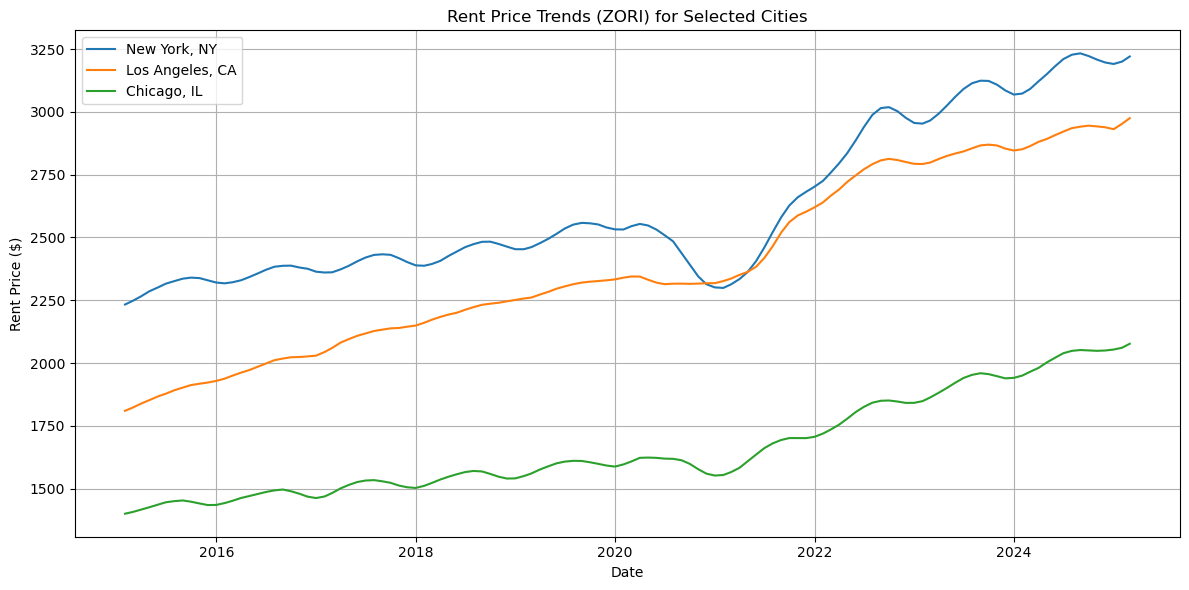

In [21]:
import matplotlib.pyplot as plt

# Cities you want to visualize
cities_to_plot = ['New York, NY', 'Los Angeles, CA', 'Chicago, IL']

# Filter for those cities
filtered = zori_long[zori_long['RegionName'].isin(cities_to_plot)]

# Plotting
plt.figure(figsize=(12, 6))
for city in cities_to_plot:
    city_data = filtered[filtered['RegionName'] == city]
    plt.plot(city_data['Date'], city_data['RentPrice'], label=city)

plt.title('Rent Price Trends (ZORI) for Selected Cities')
plt.xlabel('Date')
plt.ylabel('Rent Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()this is what we got

In [23]:
# Look at cities that include 'TX' in their StateName or RegionName
zori_long[zori_long['StateName'] == 'TX']['RegionName'].unique()

array(['Abilene, TX', 'Amarillo, TX', 'Athens, TX', 'Austin, TX',
       'Bay City, TX', 'Beaumont, TX', 'Big Spring, TX', 'Bonham, TX',
       'Brenham, TX', 'Brownsville, TX', 'College Station, TX',
       'Corpus Christi, TX', 'Corsicana, TX', 'Dallas, TX',
       'Eagle Pass, TX', 'El Paso, TX', 'Fredericksburg, TX',
       'Gainesville, TX', 'Granbury, TX', 'Houston, TX', 'Huntsville, TX',
       'Jacksonville, TX', 'Kerrville, TX', 'Killeen, TX',
       'Kingsville, TX', 'Laredo, TX', 'Longview, TX', 'Lubbock, TX',
       'McAllen, TX', 'Midland, TX', 'Nacogdoches, TX', 'Odessa, TX',
       'Paris, TX', 'Rockport, TX', 'San Angelo, TX', 'San Antonio, TX',
       'Sherman, TX', 'Stephenville, TX', 'Texarkana, TX', 'Tyler, TX',
       'Victoria, TX', 'Waco, TX', 'Wichita Falls, TX'], dtype=object)

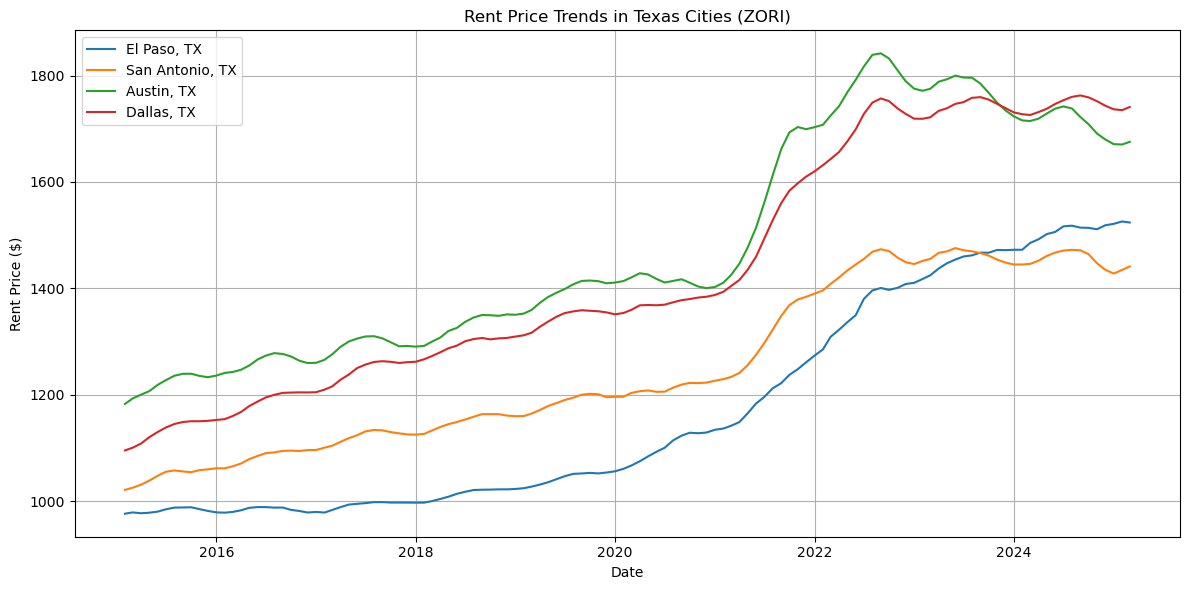

In [25]:
# Texas cities to visualize
tx_cities = ['El Paso, TX', 'San Antonio, TX', 'Austin, TX', 'Dallas, TX']

# Filter data
filtered_tx = zori_long[zori_long['RegionName'].isin(tx_cities)]

# Plot
plt.figure(figsize=(12, 6))
for city in tx_cities:
    city_data = filtered_tx[filtered_tx['RegionName'] == city]
    plt.plot(city_data['Date'], city_data['RentPrice'], label=city)

plt.title('Rent Price Trends in Texas Cities (ZORI)')
plt.xlabel('Date')
plt.ylabel('Rent Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
!pip install prophet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 6.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 903.1/903.1 kB 6.2 MB/s eta 0:00:00


In [41]:
from prophet import Prophet

In [49]:
austin_df = zori_long[zori_long['RegionName'] == 'Austin, TX'][['Date', 'RentPrice']].copy()
austin_df.rename(columns={'Date': 'ds', 'RentPrice': 'y'}, inplace=True)

In [51]:
austin_df.head()

,ds,y
2481,2015-01-31,1182.768227
2482,2015-02-28,1192.972425
2483,2015-03-31,1200.229787
2484,2015-04-30,1206.705699
2485,2015-05-31,1218.690981


In [55]:
# Clean any NaNs
austin_df.dropna(subset=['ds', 'y'], inplace=True)

In [57]:
model = Prophet()
model.fit(austin_df)

01:07:02 - cmdstanpy - INFO - Chain [1] start processing
01:07:02 - cmdstanpy - INFO - Chain [1] done processing


In [59]:
austin_df[austin_df['ds'].isna()]

,ds,y


In [61]:
# Generate future dates (12 months ahead)
future = model.make_future_dataframe(periods=12, freq='M')

# Create forecast
forecast = model.predict(future)

/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [63]:
future = model.make_future_dataframe(periods=12, freq='ME')

In [65]:
# Filter for El Paso
el_paso_df = zori_long[zori_long['RegionName'] == 'El Paso, TX'][['Date', 'RentPrice']].copy()

# Rename columns for Prophet
el_paso_df.rename(columns={'Date': 'ds', 'RentPrice': 'y'}, inplace=True)

# Drop any missing values
el_paso_df.dropna(subset=['ds', 'y'], inplace=True)

In [67]:
el_model = Prophet()
el_model.fit(el_paso_df)

01:13:41 - cmdstanpy - INFO - Chain [1] start processing
01:13:41 - cmdstanpy - INFO - Chain [1] done processing


In [71]:
# Forecast next 12 months
el_future = el_model.make_future_dataframe(periods=12, freq='ME')
el_forecast = el_model.predict(el_future)

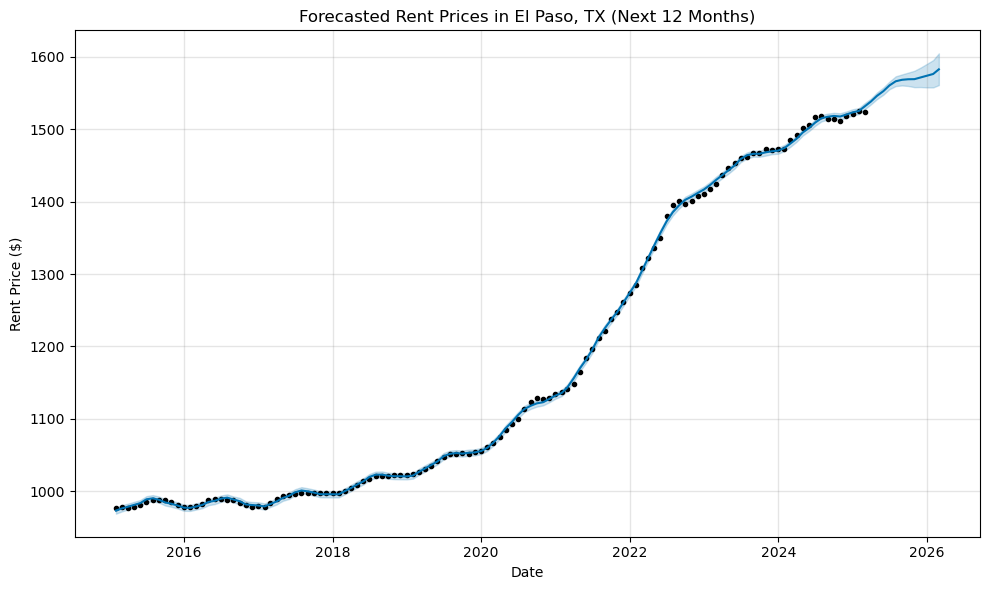

In [73]:
fig = el_model.plot(el_forecast)
plt.title('Forecasted Rent Prices in El Paso, TX (Next 12 Months)')
plt.xlabel('Date')
plt.ylabel('Rent Price ($)')
plt.tight_layout()
plt.show()

In [75]:
san_df = zori_long[zori_long['RegionName'] == 'San Antonio, TX'][['Date', 'RentPrice']].copy()
san_df.rename(columns={'Date': 'ds', 'RentPrice': 'y'}, inplace=True)
san_df.dropna(subset=['ds', 'y'], inplace=True)

In [77]:
san_model = Prophet()
san_model.fit(san_df)

san_future = san_model.make_future_dataframe(periods=12, freq='ME')
san_forecast = san_model.predict(san_future)

01:16:02 - cmdstanpy - INFO - Chain [1] start processing
01:16:02 - cmdstanpy - INFO - Chain [1] done processing


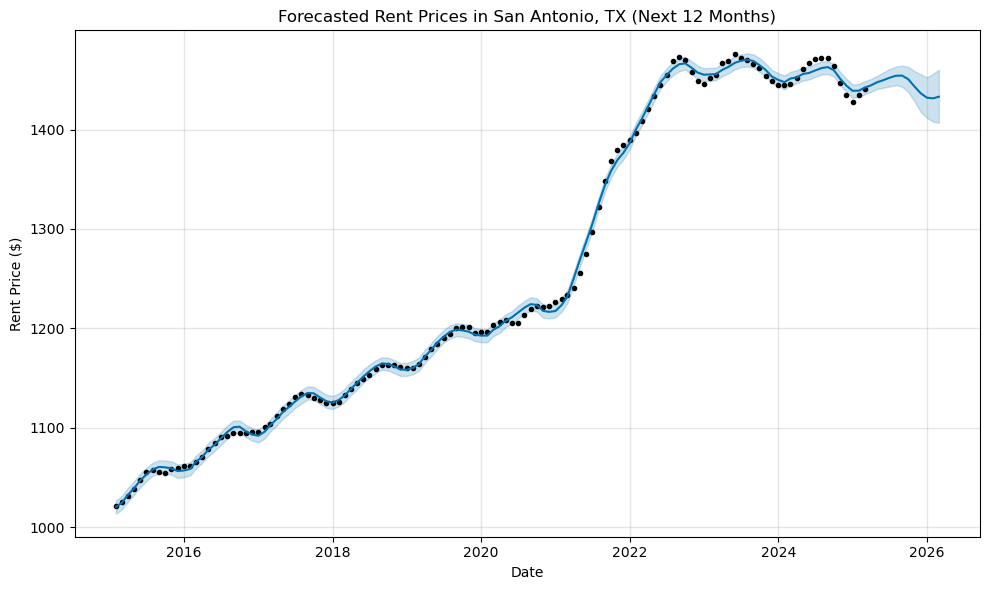

In [79]:
fig = san_model.plot(san_forecast)
plt.title('Forecasted Rent Prices in San Antonio, TX (Next 12 Months)')
plt.xlabel('Date')
plt.ylabel('Rent Price ($)')
plt.tight_layout()
plt.show()

In [81]:
dallas_df = zori_long[zori_long['RegionName'] == 'Dallas, TX'][['Date', 'RentPrice']].copy()
dallas_df.rename(columns={'Date': 'ds', 'RentPrice': 'y'}, inplace=True)
dallas_df.dropna(subset=['ds', 'y'], inplace=True)

In [83]:
dallas_model = Prophet()
dallas_model.fit(dallas_df)

dallas_future = dallas_model.make_future_dataframe(periods=12, freq='ME')
dallas_forecast = dallas_model.predict(dallas_future)

01:16:34 - cmdstanpy - INFO - Chain [1] start processing
01:16:34 - cmdstanpy - INFO - Chain [1] done processing


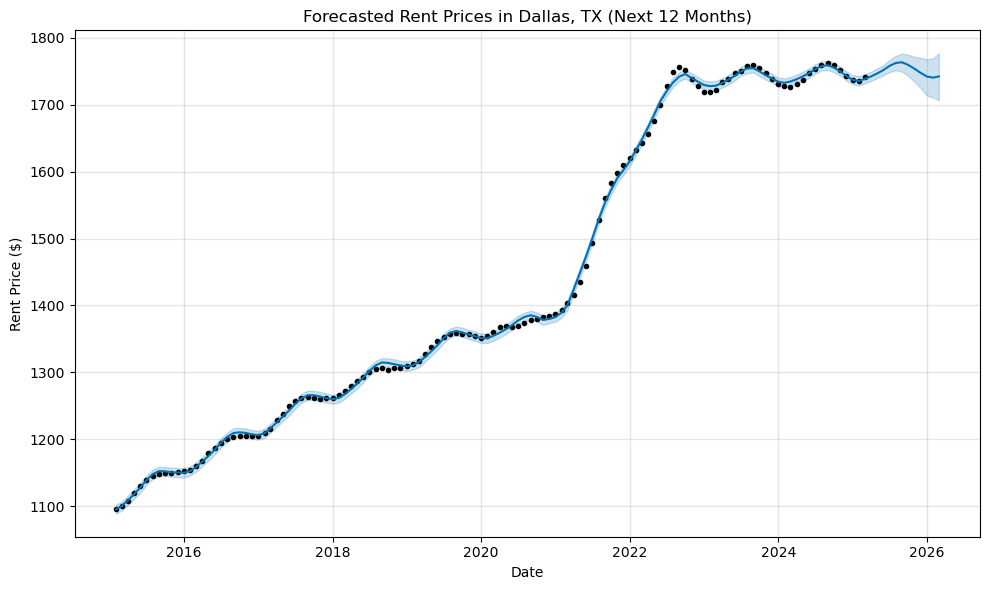

In [85]:
fig = dallas_model.plot(dallas_forecast)
plt.title('Forecasted Rent Prices in Dallas, TX (Next 12 Months)')
plt.xlabel('Date')
plt.ylabel('Rent Price ($)')
plt.tight_layout()
plt.show()

In [87]:
def format_forecast(city_name, original_df, forecast_df):
    # Actuals
    actual = original_df.copy()
    actual['type'] = 'actual'
    actual['City'] = city_name
    actual = actual[['ds', 'y', 'type', 'City']]

    # Forecasted
    forecast = forecast_df[['ds', 'yhat']].copy()
    forecast.rename(columns={'yhat': 'y'}, inplace=True)
    forecast['type'] = 'forecast'
    forecast['City'] = city_name

    # Remove any forecast dates that already exist in actuals
    last_actual_date = actual['ds'].max()
    forecast = forecast[forecast['ds'] > last_actual_date]

    # Combine
    combined = pd.concat([actual, forecast], ignore_index=True)
    return combined

In [89]:
austin_final = format_forecast('Austin, TX', austin_df, forecast)
el_paso_final = format_forecast('El Paso, TX', el_paso_df, el_forecast)
san_antonio_final = format_forecast('San Antonio, TX', san_df, san_forecast)
dallas_final = format_forecast('Dallas, TX', dallas_df, dallas_forecast)

In [ ]:
# Combine all cities
full_forecast = pd.concat([austin_final, el_paso_final, san_antonio_final, dallas_final], ignore_index=True)

# Save to your cleaned folder
full_forecast.to_csv('../data/cleaned/forecast_output.csv', index=False)

# Preview
full_forecast.tail()